# Исследование надежности заемщиков


На основе статистики о платёжеспособности клиентов исследовать влияет ли семейное положение и количество детей клиента на факт возврата кредита в срок

**Описание данных:**
- **children** — количество детей в семье
- **days_employed** — общий трудовой стаж в днях
- **dob_years** — возраст клиента в годах
- **education** — уровень образования клиента
- **education_id** — идентификатор уровня образования
- **family_status** — семейное положение
- **family_status_id** — идентификатор семейного положения
- **gender** — пол клиента
- **income_type** — тип занятости
- **debt** — имел ли задолженность по возврату кредитов
- **total_income** — ежемесячный доход
- **purpose** — цель получения кредита

## Откроем таблицу и изучим общую информацию о данных

**Задание 1. Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/data.csv')

**Задание 2. Выведим первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведим основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведим количество пропущенных значений для каждого столбца. Используем комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [5]:
k = data.isna()

Расчет количества одновременно пропущенных значений у клиента в столбцах "days_employed" и "total_income". 

In [6]:
i=0
for p in range(0,len(k)):
    if k.loc[p,'days_employed'] & k.loc[p,'total_income']:
        i += 1
print(i)

2174


**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце обработуем на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [7]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода `abs()`.**

In [8]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведим медианное значение трудового стажа `days_employed` в днях.**

In [9]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведим перечень уникальных значений столбца `children`.**

In [10]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [11]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведим перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [12]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [13]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедимся, что все пропуски заполнены. Проверим себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [14]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [15]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру. Проверим остальные столбцы.**

In [16]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведим на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.**

In [17]:
data.duplicated().sum()

71

In [18]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 назначим категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используем собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [19]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [20]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведим на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [21]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используем собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучим данные в столбце `purpose` и определим, какие подстроки помогут правильно определить категорию.**

In [22]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [23]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,B,операции с недвижимостью
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,C,операции с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,операции с автомобилем


### Шаг 3. Исследуем данные и ответим на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [24]:
#Сгруппируем данные по кол-ву детей и посчитаем общее кол-во значений.
children_grouping_dept =  pd.DataFrame(data.groupby('children')['debt'].count())

#Сгруппируем данные по кол-ву детей и посчитаем кол-во знаечний возвращенного кредита в срок в каждой группе.
children_grouping_dept['debt_0'] = pd.DataFrame(data.loc[data['debt'] == 0].groupby('children')['debt'].count())

#Расчет процента взявших кредит в категории от общего количества выданных кредитов
children_grouping_dept['debt_%'] = (children_grouping_dept['debt']/children_grouping_dept['debt'].sum())*100

#Расчет процента возвративших кредит в срок в категории от количества выданных кредитов в данной категории
children_grouping_dept['debt_0_%'] = (children_grouping_dept['debt_0']/children_grouping_dept['debt'])*100

#Расчет процента не возвративших кредит в срок в категории от количества выданных кредитов в данной категории
children_grouping_dept['debt_1_%'] = 100 - children_grouping_dept['debt_0_%']


children_grouping_dept = children_grouping_dept.reset_index() #создание новых индексов и удаление старых
children_grouping_dept

,children,debt,debt_0,debt_%,debt_0_%,debt_1_%
0,0,14091,13028,66.058788,92.456178,7.543822
1,1,4808,4364,22.539965,90.765391,9.234609
2,2,2052,1858,9.619802,90.545809,9.454191
3,3,330,303,1.547044,91.818182,8.181818
4,4,41,37,0.192209,90.243902,9.756098
5,5,9,9,0.042192,100.000000,0.000000


<AxesSubplot:xlabel='children', ylabel='debt_%'>

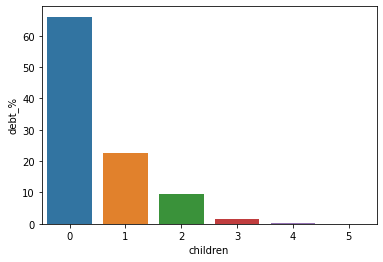

In [25]:
import seaborn
seaborn.barplot(x=children_grouping_dept['children'], y=children_grouping_dept['debt_%'])

**Вывод:** 
C увеличением количества детей у клиентов уменьшается спрос на взятия кредита. Основная масса кредитов приходится на людей у которых нет детей. Во всех категориях около 90% возвратов по кредитам. Явно выраженной зависимости между количеством детей и возвратом кредита в срок не выявлено.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [26]:
#Сгруппируем данные по семейному положению и посчитаем общее кол-во значений.
family_status_grouping_dept =  pd.DataFrame(data.groupby('family_status')['debt'].count())

#Сгруппируем данные по семейному положению и посчитаем кол-во знаечний возвращенного кредита в срок в каждой группе.
family_status_grouping_dept['debt_0'] = pd.DataFrame(data.loc[data['debt'] == 0].groupby('family_status')['debt'].count())

#Расчет процента взявших кредит в категории от общего количества выданных кредитов
family_status_grouping_dept['debt_%'] = (family_status_grouping_dept['debt']/family_status_grouping_dept['debt'].sum())*100

#Расчет процента возвративших кредит в срок в категории от количества выданных кредитов в данной категории
family_status_grouping_dept['debt_0_%'] = (family_status_grouping_dept['debt_0']/family_status_grouping_dept['debt'])*100

#создание новых индексов и удаление старых
family_status_grouping_dept = family_status_grouping_dept.reset_index() 
family_status_grouping_dept


,family_status,debt,debt_0,debt_%,debt_0_%
0,Не женат / не замужем,2796,2523,13.107684,90.236052
1,в разводе,1189,1105,5.574047,92.935240
2,вдовец / вдова,951,888,4.458300,93.375394
3,гражданский брак,4134,3749,19.380245,90.686986
4,женат / замужем,12261,11334,57.479724,92.439442


Построим гистограмму кол-ва вовзративших кредитов в срок

[Text(0, 0, 'Не женат / не замужем'),
 Text(1, 0, 'в разводе'),
 Text(2, 0, 'вдовец / вдова'),
 Text(3, 0, 'гражданский брак'),
 Text(4, 0, 'женат / замужем')]

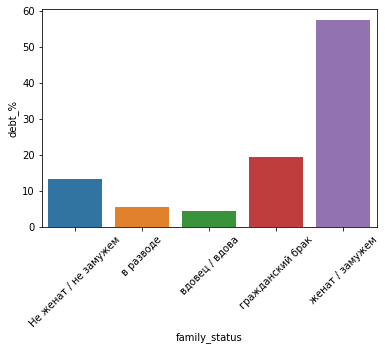

In [27]:
ax = seaborn.barplot(x=family_status_grouping_dept['family_status'], 
                     y=family_status_grouping_dept['debt_%'])

ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

<AxesSubplot:xlabel='debt_%', ylabel='family_status'>

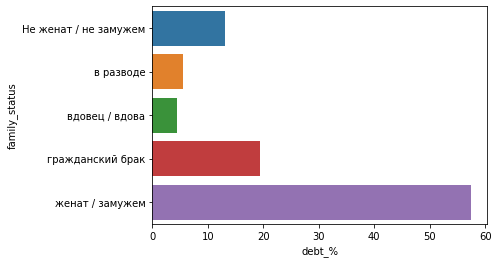

In [28]:
(
    seaborn
    .barplot(x = family_status_grouping_dept['debt_%'], 
             y = family_status_grouping_dept['family_status']
             )
)

**Вывод:** 
57% кредитов берут люди из категории "женат/замужем". Около 32% на "гражданский брак" и "Не женат / не замужем" Во всех категориях около 90% возвратов по кредитам. 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [29]:
# Сгруппируем данные по уровню дохода и посчитаем общее кол-во значений.
total_income_category_grouping_dept = (
    pd.DataFrame(
        data.groupby('total_income_category')['debt'].count()
    )
)

In [30]:
#Сгруппируем данные по уровню дохода и 
#посчитаем кол-во знаечний возвращенного кредита в срок в каждой группе.
total_income_category_grouping_dept['debt_0'] = (
    pd.DataFrame(
        data.loc[data['debt'] == 0].groupby('total_income_category')['debt'].count()
    )
)

In [31]:
#Расчет процента взявших кредит в категории от общего количества выданных кредитов
total_income_category_grouping_dept['debt_%'] = (
    (total_income_category_grouping_dept['debt'])
    /(total_income_category_grouping_dept['debt'].sum())*100
)

In [32]:
#Расчет процента возвративших кредит в срок в категории от количества выданных кредитов в данной категории
total_income_category_grouping_dept['debt_0_%'] = (
    (total_income_category_grouping_dept['debt_0'])/
    (total_income_category_grouping_dept['debt'])*100
)

In [33]:
#создание новых индексов и удаление старых
total_income_category_grouping_dept = total_income_category_grouping_dept.reset_index() 

In [34]:
#Вывод таблицы
total_income_category_grouping_dept

,total_income_category,debt,debt_0,debt_%,debt_0_%
0,A,25,23,0.117200,92.000000
1,B,5014,4660,23.505696,92.939769
2,C,15921,14568,74.637851,91.501790
3,D,349,328,1.636116,93.982808
4,E,22,20,0.103136,90.909091


<AxesSubplot:xlabel='total_income_category', ylabel='debt_%'>

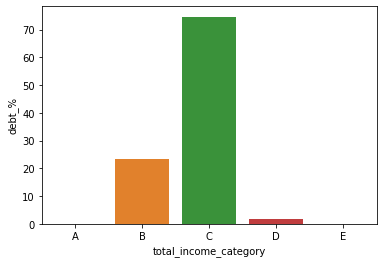

In [35]:
seaborn.barplot(x = total_income_category_grouping_dept['total_income_category'], 
                y = total_income_category_grouping_dept['debt_%'])

**Вывод:** Основаня масса кредитов у людей из категории "С" (75%) и "B"(23,5%). Таким образом кредиты берут в основном люди с средним доходом и выше среднего. Во всех категориях около 90% возвратов по кредитам.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [36]:
#Сгруппируем данные по целям кредита и посчитаем общее кол-во значений.
purpose_category_grouping_dept =  pd.DataFrame(data.groupby('purpose_category')['debt'].count())

#Сгруппируем данные по целям кредита и посчитаем кол-во знаечний возвращенного кредита в срок в каждой группе.
purpose_category_grouping_dept['debt_0'] = pd.DataFrame(data.loc[data['debt'] == 0].groupby('purpose_category')['debt'].count())

#Расчет процента взявших кредит в категории от общего количества выданных кредитов
purpose_category_grouping_dept['debt_%'] = (purpose_category_grouping_dept['debt']/purpose_category_grouping_dept['debt'].sum())*100

#Расчет процента возвративших кредит в срок в категории от количества выданных кредитов в данной категории
purpose_category_grouping_dept['debt_0_%'] = (purpose_category_grouping_dept['debt_0']/purpose_category_grouping_dept['debt'])*100

purpose_category_grouping_dept = purpose_category_grouping_dept.reset_index() #создание новых индексов и удаление старых
purpose_category_grouping_dept



,purpose_category,debt,debt_0,debt_%,debt_0_%
0,операции с автомобилем,4279,3879,20.060007,90.652022
1,операции с недвижимостью,10751,9971,50.400825,92.744861
2,получение образования,3988,3619,18.695795,90.747242
3,проведение свадьбы,2313,2130,10.843373,92.088197


[Text(0, 0, 'операции с автомобилем'),
 Text(1, 0, 'операции с недвижимостью'),
 Text(2, 0, 'получение образования'),
 Text(3, 0, 'проведение свадьбы')]

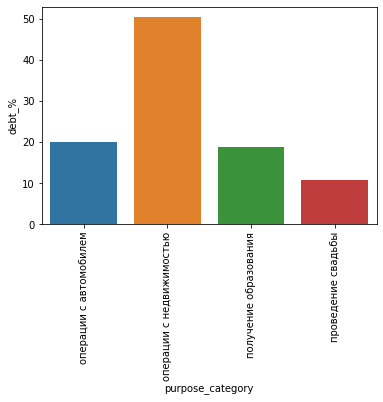

In [37]:
ax = seaborn.barplot(x=purpose_category_grouping_dept['purpose_category'], 
                y=purpose_category_grouping_dept['debt_%'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

**Вывод:** Половина людей берут кредит для цели "операции с недвижимостью". Во всех категориях около 90% возвратов по кредитам.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

Возможные причины появления пропусков в исходных данных является возможная техническая неполадка

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:*
Так как у количественных значениях в базе данных может быть слишком большой разброс и они явно могут выделяться, то среднее значение может некорректно характиризовать данные. Поэтому применяют медианное решение.

### Шаг 4: общий вывод.

Было проведено исследование в котором необходимо было разобраться,в влиянии различных факторов на погашения кредита в срок.\
Входные данные от банка — статистика о платёжеспособности клиентов.\
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.\
\
Поставленные вопросы в рамках исследования.
- Есть ли зависимость между количеством детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?

**1. Зависимость между количеством детей и возвратом кредита в срок**\
\
**Процента возврата кредитов в срок:**
        
- 92.5 % - без детей
- 90.8 % - 1 ребенок
- 90.5 % - 2 ребенка
- 91.8 % - 3 ребенка 
- 90.2 % - 4 ребенка 
- 100  % - 5 детей
        
**Процента взявших кредит в рассматриваемой категории:**
        
- 66.1 % - без детей
- 22.5 % - 1 ребенок
- 9.6  % - 2 ребенка
- 1.5  % - 3 ребенка 
- 0.2  % - 4 ребенка 
- 0.04 % - 5 детей
        
**Вывод: Зависимость не однозначная** \
По данным нельзя однозначно сказазать, как количество детей влияет на возврат кредита. Так если отбросить данные с кол-вом детей 3-4 ребенка (так как от общего кол-ва клиентов это составляет менее 2%), то в основном процент невозврата  составляет 8-10%.Таким образом разница составляет 2%. \
Однако замечена тенденция, что основная масса кредитов (66.1 %) приходится на людей у которых нет детей и они же вероятней всего выплатят кредит вовремя. Возможно необходим больший набор данных по категории с 3,4 и 5 детьми.

**2. Зависимость между семейным положением и возвратом кредита в срок*\
\
**Процента возврата кредитов в срок:**
        
- 90.2 % - Не женат / не замужем
- 93.0 % - в разводе
- 93.4  % - вдовец / вдова
- 90.7  % - гражданский брак 
- 92.4  % - женат / замужем	 
        
**Процента взявших кредит в рассматриваемой категории:**
        
- 13.2 % - Не женат / не замужем
- 5.6 % - в разводе
- 4.5  % - вдовец / вдова
- 19.4  % - гражданский брак 
- 57.5  % - женат / замужем	 
        
**Вывод: зависимость присутствует**
57% кредитов берут люди из категории "женат/замужем". Около 32% на "гражданский брак" и "Не женат / не замужем".
Последние две категории дают меньший процент возврата по отношению к другим.
        
                  
**3. Зависимость между уровнем дохода и возвратом кредита в срок*\
\
**Процента возврата кредитов в срок:**
        
- 92.0 % - A (1000001 и выше)
- 92.9 % - B (200001–1000000)
- 91.5  % - C (50001–200000)
- 94.0  % - D (30001–50000)
- 90.9  % - E (0–30000)
        
**Процента взявших кредит в рассматриваемой категории:**
        
- 0.1  % - A (1000001 и выше)
- 23.5 % - B (200001–1000000)
- 74.6 % - C (50001–200000)
- 1.6  % - D (30001–50000)
- 0.1  % - E (0–30000)
        
**Вывод: Зависимость не однозначная** \
Основаня масса кредитов у людей из категории "С" (75%) и "B"(23,5%). Таким образом кредиты берут в основном люди с средним доходом и выше среднего. Во всех категориях около 90%-95% возвратов по кредитам. Явно выраженной зависимости между уровнем дохода и возвратом кредита в срок не выявлено. Необходимы дополнительные данные по категориям "A","D","E".
        

**4. Влияние  цели кредита на его возврат в срок*\
\
**Процента возврата кредитов в срок:**
        
- 90.6 % - операции с автомобилем
- 92.7 % - операции с недвижимостью
- 90.7 % - получение образования
- 92.0 % - проведение свадьбы 

        
**Процента взявших кредит в рассматриваемой категории:**
        
- 20.1 % - операции с автомобилем
- 50.4  % - операции с недвижимостью
- 18.7  % - получение образования 
- 10.8  % - проведение свадьбы 

        
**Вывод: зависимость присутствует**
Половина людей берут кредит для цели "операции с недвижимостью". 

        
Рекомендаци: 
- увеличить кол-во исходных данных в первом и третьем вопросе. 
- специалистам использовать цели кредита и семейное положение для оценки влияние возврата кредита в срок.
Доп. рекоментации: проверить причины одновременных пропусков. Вдруг с увеличением данных ошибка начнет расти не в пропорциональном соотношении.